In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('D:\Fold1\Data Science Learning\Data-Capstone-Projects\911.csv')

In [5]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


##### Info for the data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


##### Top 5 zip codes for the 911 calls

In [7]:
dataset['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Top 5 townships for 911 calls

In [8]:
dataset['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Count plot on reasons for the calls

In [9]:
dataset['title'].iloc[0].split(":")[0]
dataset['reason']=dataset['title'].apply(lambda x: x.split(":")[0])

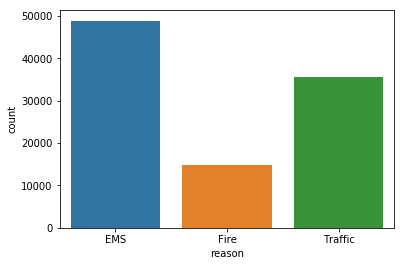

In [10]:
sns.countplot(dataset['reason'])

#### Top reason for the call

In [11]:
dataset['reason'].value_counts().head(1)

EMS    48877
Name: reason, dtype: int64

#### Convert the timestamp column values to date objects

In [12]:
type(dataset['timeStamp'][0])

str

In [13]:
dataset['timeStamp']=pd.to_datetime(dataset['timeStamp'])
type(dataset['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
dataset['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [15]:
print(dataset['timeStamp'].iloc[0].hour)

17


In [16]:
dataset['hour']=dataset['timeStamp'].apply(lambda x: x.hour)
dataset['month']=dataset['timeStamp'].apply(lambda x: x.month)
dataset['weekday']=dataset['timeStamp'].apply(lambda x: x.dayofweek)

In [123]:
dataset['month'].describe()

count    99492.000000
mean         4.983195
std          3.012176
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         12.000000
Name: month, dtype: float64

In [17]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### Map the week names to the dataset

In [18]:
weekname={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [19]:
dataset['weekday']=dataset['weekday'].map(weekname)

#### Plot the count plot for the weekdays based on reason

In [22]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


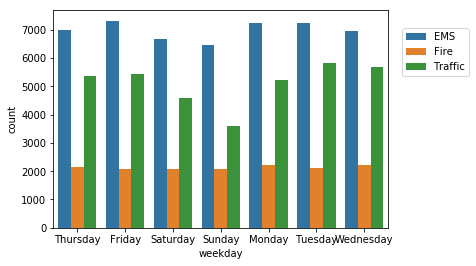

In [32]:
sns.countplot(x='weekday',data=dataset,hue='reason')
plt.legend(loc=(1.04,0.7))

### Count plot for month based on reasons

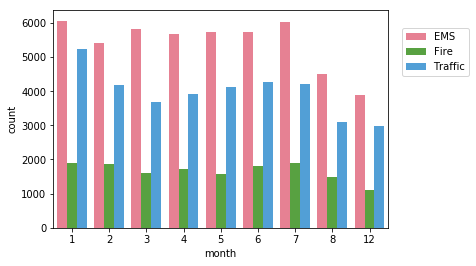

In [46]:
sns.countplot(x='month',data=dataset,hue='reason',palette='husl')
plt.legend(loc=(1.04,0.7))

#note : month are numbered meaning (1 is Jan, 2 is Feb...)

#### as the month values are not completly show, using simple line plot observe the trend

In [37]:
bymonth=dataset.groupby('month').count()

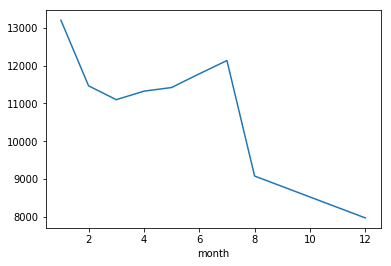

In [41]:
bymonth['lat'].plot()

In [60]:
t=dataset['timeStamp'][0]
t.date()
dataset['Date']=dataset['timeStamp'].apply(lambda x: x.date())
dataset.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,weekday,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10


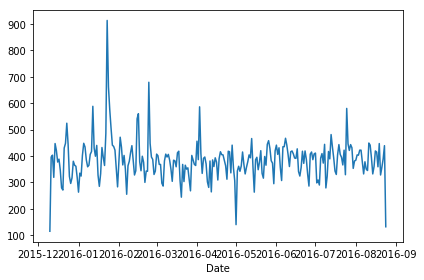

In [74]:
bydate=dataset.groupby('Date').count()
bydate['lat'].plot()
plt.tight_layout()

In [73]:
dataset['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

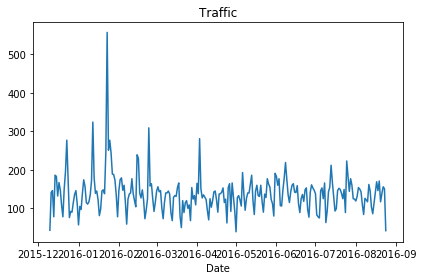

In [80]:
dataset[dataset['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

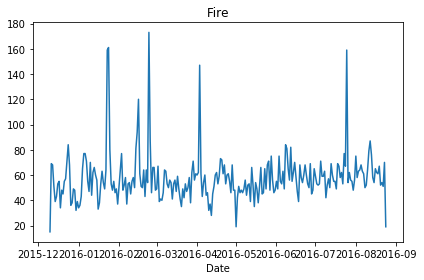

In [82]:
dataset[dataset['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title("Fire")
plt.tight_layout()

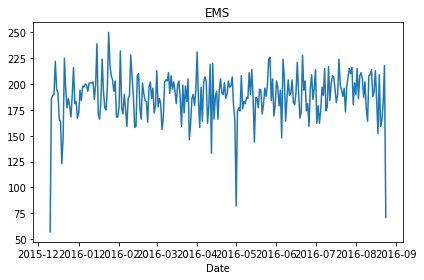

In [83]:
dataset[dataset['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title("EMS")
plt.tight_layout()